In [1]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

import pyspark

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 229 kB in 1s (159 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
45 packages can be upgraded. Run 'apt list --upgradable' to see them.
tar: spark-3.2.1-bin-hadoop3.2.tgz: Cannot open:

In [2]:
import pyspark
import pyspark.sql.functions as F
import numpy as np
from pyspark.sql import SparkSession
import numpy as np
from datetime import datetime, timedelta
from pyspark.sql.window import Window
import numpy as np
import math
import pandas as pd
import subprocess
from google.colab import drive
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
import pandas as pd

In [3]:
################################
appName = 'ggalego_cl5_<sparksql'
spark = SparkSession.builder\
                    .appName(appName) \
                    .getOrCreate()
sc = spark.sparkContext

In [4]:
spark

In [5]:
from pyspark.sql.types import ArrayType, StringType, IntegerType, FloatType
from pyspark.ml.functions import array_to_vector


In [6]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize a Spark session
spark = SparkSession.builder.appName("example").getOrCreate()

# Read the DataFrame from the CSV
path = "datos_yum.csv"  # replace with the correct path to your CSV
df = spark.read.csv(path, header=True, inferSchema=True)

# Rename the columns to remove the '_u1' suffix
for column in df.columns:
    df = df.withColumnRenamed(column, column.replace("_u1.", ""))

# Show the DataFrame to verify the column names
df.show()

# Now you can create or replace the temp view with the new DataFrame
df.createOrReplaceTempView("yum")



+----------+------+-------+------------------+------------------+------------------+------------------+------------------+-------+
|      date|ticker|    cik|              open|              high|               low|             close|         adj_close| volume|
+----------+------+-------+------------------+------------------+------------------+------------------+------------------+-------+
|2021-01-04|   YUM|1041061| 109.0199966430664| 109.0199966430664|104.86000061035156|105.81999969482422| 99.72776794433594|2058200|
|2021-01-05|   YUM|1041061|105.63999938964844| 106.3499984741211|105.19999694824219|105.83000183105469| 99.73719024658203|1475300|
|2021-01-06|   YUM|1041061|105.62999725341797|106.69999694824219|105.38999938964844|106.41000366210938|100.28380584716797|1352700|
|2021-01-07|   YUM|1041061|             106.5|106.98999786376953|105.27999877929688| 105.5999984741211| 99.52044677734375|2222900|
|2021-01-08|   YUM|1041061|105.80999755859375|107.44999694824219|105.62000274658203

In [7]:
from pyspark.sql.functions import to_date
# Convert the 'date' column to a proper date format if not already done
df = df.withColumn('date', to_date(col('date'), 'yyyy-MM-dd'))

# Filter data up to the end of 2023 for training
train_data = df.filter(col('date') <= '2023-12-31')

# Assuming the DataFrame includes data for at least the first 7 days of 2024
# Filter data for the first 7 days of 2024 for testing
test_data = df.filter((col('date') > '2023-12-31') & (col('date') <= '2024-01-10'))
test_data.show()

+----------+------+-------+------------------+------------------+------------------+------------------+------------------+-------+
|      date|ticker|    cik|              open|              high|               low|             close|         adj_close| volume|
+----------+------+-------+------------------+------------------+------------------+------------------+------------------+-------+
|2024-01-02|   YUM|1041061|129.72999572753906| 130.6999969482422| 128.9499969482422|129.02999877929688|128.38748168945312|1485300|
|2024-01-03|   YUM|1041061|130.05999755859375| 130.5399932861328|128.94000244140625|129.10000610351562| 128.4571533203125|1483600|
|2024-01-04|   YUM|1041061|128.39999389648438| 129.6199951171875|127.79000091552734|128.69000244140625|128.04917907714844|3019000|
|2024-01-05|   YUM|1041061|128.85000610351562|129.10000610351562|127.44000244140625|128.33999633789062|127.70092010498047|1408800|
|2024-01-08|   YUM|1041061| 128.2100067138672|128.77999877929688|127.18000030517578

In [8]:
df_spark = df.select('date', 'open', 'high', 'low', 'close', 'adj_close', 'volume')

In [9]:
# Assemble features
feature_columns = ['open', 'high', 'low', 'volume']
feature_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
train_data = feature_assembler.transform(train_data).select("features", "close")
test_data = feature_assembler.transform(test_data).select("features", "close")


In [10]:
# Fit the linear regression model
lr = LinearRegression(featuresCol='features', labelCol='close')
lr_model = lr.fit(train_data)

In [11]:
# Make predictions
predictions = lr_model.transform(test_data)
predictions.show()


+--------------------+------------------+------------------+
|            features|             close|        prediction|
+--------------------+------------------+------------------+
|[129.729995727539...|129.02999877929688|129.85397818264357|
|[130.059997558593...|129.10000610351562|129.53081758820096|
|[128.399993896484...|128.69000244140625|128.88898134836722|
|[128.850006103515...|128.33999633789062|127.91144018207696|
|[128.210006713867...|128.63999938964844|127.81893640976774|
|[127.860000610351...|128.22000122070312|127.70220194741778|
|[128.0,129.570007...| 129.1999969482422|128.41680120926858|
+--------------------+------------------+------------------+



In [12]:
# Evaluate the model
evaluator = RegressionEvaluator(labelCol="close", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coefficient of Determination (R^2): {r2}")

Root Mean Squared Error (RMSE): 0.6145206780746556
Mean Absolute Error (MAE): 0.5720548489923313
Coefficient of Determination (R^2): -2.045540717912375


In [13]:
from pyspark.sql.functions import to_date
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Convert the 'date' column to a proper date format
df = df.withColumn('date', to_date(col('date'), 'yyyy-MM-dd'))

# Filter data up to the end of 2023 for training
train_data = df.filter(col('date') <= '2023-12-31')

# Assuming the DataFrame includes data for at least the first 7 days of 2024
# Filter data for the first 7 days of 2024 for testing
test_data = df.filter((col('date') > '2023-12-31') & (col('date') <= '2024-01-10'))

# Assemble features and prepare data for scaling
feature_columns = ['open', 'high', 'low', 'volume']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="unscaled_features")
train_data = assembler.transform(train_data).select('date', 'unscaled_features', 'close')
test_data = assembler.transform(test_data).select('date', 'unscaled_features', 'close')


In [14]:
from pyspark.ml.feature import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler(inputCol="unscaled_features", outputCol="features", withStd=True, withMean=False)
# Fit the scaler to the data and transform
scaler_model = scaler.fit(train_data)




In [15]:
# Scale the features for both training and testing data
train_data = scaler_model.transform(train_data)
test_data = scaler_model.transform(test_data)

In [16]:
# Fit the linear regression model on the scaled training data
lr = LinearRegression(featuresCol='features', labelCol='close')
lr_model = lr.fit(train_data.select('features', 'close'))

In [17]:
# Make predictions on the scaled test data
predictions = lr_model.transform(test_data)
predictions.show()


+----------+--------------------+------------------+--------------------+------------------+
|      date|   unscaled_features|             close|            features|        prediction|
+----------+--------------------+------------------+--------------------+------------------+
|2024-01-02|[129.729995727539...|129.02999877929688|[6.94893657615945...|129.85397818264468|
|2024-01-03|[130.059997558593...|129.10000610351562|[6.96661299541126...| 129.5308175882272|
|2024-01-04|[128.399993896484...|128.69000244140625|[6.87769554729528...| 128.8889813483684|
|2024-01-05|[128.850006103515...|128.33999633789062|[6.90180027548570...|127.91144018211601|
|2024-01-08|[128.210006713867...|128.63999938964844|[6.86751895802703...|127.81893640978619|
|2024-01-09|[127.860000610351...|128.22000122070312|[6.84877101773027...|127.70220194743315|
|2024-01-10|[128.0,129.570007...| 129.1999969482422|[6.85627003038276...|128.41680120924568|
+----------+--------------------+------------------+------------------

In [18]:
# Evaluate the model
evaluator = RegressionEvaluator(labelCol="close", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coefficient of Determination (R^2): {r2}")

Root Mean Squared Error (RMSE): 0.6145206780724578
Mean Absolute Error (MAE): 0.5720548489892658
Coefficient of Determination (R^2): -2.0455407178905904


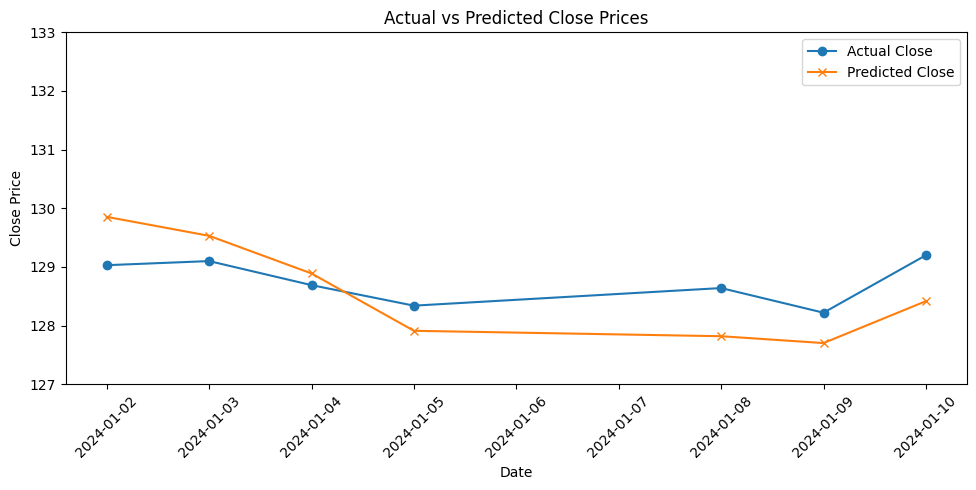

In [25]:
import matplotlib.pyplot as plt

# Convert the predictions DataFrame to Pandas
predictions_pd = predictions.select('date', 'prediction', 'close').toPandas()

# Ensure the dates are sorted
predictions_pd.sort_values('date', inplace=True)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(predictions_pd['date'], predictions_pd['close'], label='Actual Close', marker='o')
plt.plot(predictions_pd['date'], predictions_pd['prediction'], label='Predicted Close', marker='x')

# Formatting the plot
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.ylim(127, 133)

# Show plot
plt.show()
